# Supervised models predicting cubic perovskites

In this notebook, we will indulge into different supervised models.
The notebook has been modular for further implementation of other machine learning algorithms. It should be relatively straight forward to add more algorithms. 

Starting off with some basic imports. 

In [1]:
import sys
sys.path.insert(0, "../")

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from pathlib import Path
data_dir   = Path.cwd().parent / "data" 
models_dir = Path.cwd().parent / "models"

print("Current data directory {}".format(data_dir))
print("Current models directory {}".format(models_dir))

Current data directory /home/oliver/Dokumenter/masterprosjekt/predicting-perovskites/data
Current models directory /home/oliver/Dokumenter/masterprosjekt/predicting-perovskites/models


In [2]:
from src.models import train_model, predict_model
from src.features import build_features
from src.visualization import visualize

In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Feature selections
from sklearn.model_selection import RepeatedStratifiedKFold

#metrics and nice visualization
from tqdm import tqdm

# setting random seed for reproducibility
random_state=98127480

# Algorithms

Below we define the algorithm to use and its abbreviation. Parameters that are optional to tune are the parameters to the algoriths, with the default value as their optimised value.

In [4]:
InsertAlgorithms    = [LogisticRegression          (random_state=random_state),
                       DecisionTreeClassifier      (random_state=random_state),
                       RandomForestClassifier      (random_state=random_state),
                       GradientBoostingClassifier  (random_state=random_state)]
InsertAbbreviations = ["LOG", "DT", "RF", "GB"]
InsertPrettyNames   = ["Logistic regression", "Decision tree", "Random forest", "Gradient boost"]

## Read data
Then we can read the data and merge it together before scaling and applying principal component analysis to it.

Then we can read the preprocessed data using pandas library. 

In [5]:
X = pd.read_csv(data_dir / "processed" / "X.csv")
y = pd.read_csv(data_dir / "processed" / "target.csv")
data = pd.read_csv(data_dir / "processed" / "data.csv")

X

rA     rB  MA  MB    dAO    dBO  rA/rO  rB/rO      t
0    1.460  0.760  65  86  1.805  2.060  1.081  0.563  0.942
1    1.460  0.470  65  95  1.805  1.840  1.081  0.348  1.092
2    1.460  0.130  65  82  1.805  1.432  1.081  0.096  1.343
3    1.460  0.380  65  83  1.805  1.604  1.081  0.281  1.149
4    1.460  0.600  65  85  1.805  1.942  1.081  0.444  1.019
..     ...    ...  ..  ..    ...    ...    ...    ...    ...
385  1.196  0.645  12  52  2.014  1.732  0.886  0.478  0.902
386  1.196  0.600  12  61  2.014  1.750  0.886  0.444  0.923
387  1.196  0.745  12  11  2.014  1.849  0.886  0.552  0.859
388  1.196  0.670  12  43  2.014  1.791  0.886  0.496  0.891
389  1.196  0.640  12  46  2.014  1.749  0.886  0.474  0.905

[390 rows x 9 columns]

# Dataset analysis

## Optimal hyperparameters search

In this section we will find the optimal parameters used for the various algorithms. We will use imblearn's Pipeline and its implemented samplers, such as SMOTE and RandomUnderSampler. The advantage of using imblearn instead of sklearn, is that sklearn's pipeline will fit the samplers to the validation data as well, while imblearn only fit the resamplers to the training data.

In [6]:
## TEST

#rskfold = RepeatedStratifiedKFold(n_splits=numberSplits, n_repeats=numberRuns, random_state=random_state)

#a, grid = applyGridSearch(X = X, y = y.values.reshape(-1,), model=InsertAlgorithms[0], cv = rskfold, sampleMethod="")

In [7]:
includeSampleMethods = [""]#, "under"]#, "over", "both"]

Abbreviations = []
prettyNames   = []
Algorithms = []

numberRuns = 5
numberSplits = 5
rskfold = RepeatedStratifiedKFold(n_splits=numberSplits, n_repeats=numberRuns, random_state=random_state)

PerovskiteModelsBestParams = pd.Series({}, dtype="string")

for i, algorithm in tqdm(enumerate(InsertAlgorithms)):
    for method in includeSampleMethods:
        print("Finding best params for: {}".format(InsertAbbreviations[i] + " " + method))
        bestEstimator, PerovskiteModelsBestParams[InsertAbbreviations[i] + " " + method] = train_model.applyGridSearch(
                                                                            X = X, 
                                                                            y = y.values.reshape(-1,), 
                                                                        model = algorithm, 
                                                                           cv = rskfold, 
                                                                 sampleMethod = method)
        Abbreviations.append(InsertAbbreviations[i] + " " + method)
        prettyNames.append(InsertAbbreviations[i] + " " + method)
        Algorithms.append(bestEstimator)

0it [00:00, ?it/s]

Finding best params for: LOG 
Fitting 25 folds for each of 28 candidates, totalling 700 fits


1it [00:04,  4.34s/it]

Finding best params for: DT 
Fitting 25 folds for each of 280 candidates, totalling 7000 fits


2it [00:26, 14.62s/it]

Finding best params for: RF 
Fitting 25 folds for each of 84 candidates, totalling 2100 fits


3it [03:09, 82.32s/it]

Finding best params for: GB 
Fitting 25 folds for each of 84 candidates, totalling 2100 fits


4it [05:10, 77.57s/it]


findfont: Font family ['Palatino'] not found. Falling back to DejaVu Sans.


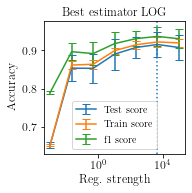

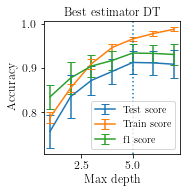

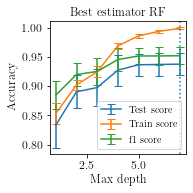

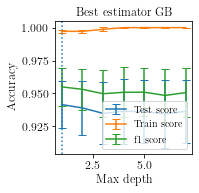

In [8]:
visualize.gridsearchVSscores(X = X, ModelsBestParams = PerovskiteModelsBestParams,
                            prettyNames = prettyNames)

# Confusion metrics 

In [9]:
PerovskiteModels = pd.Series({}, dtype="string")

5it [00:00, 49.81it/s]

Current training algorithm: LOG 


25it [00:00, 45.85it/s]


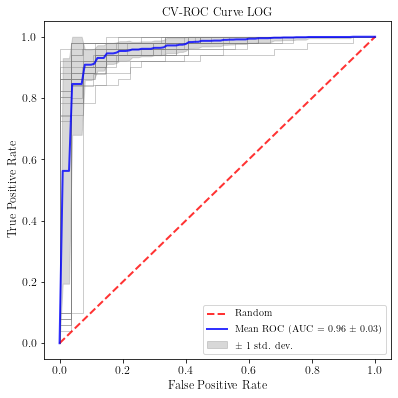

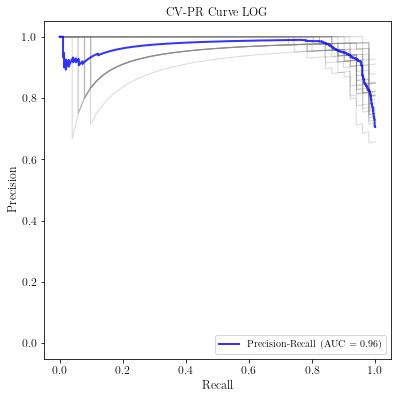

8it [00:00, 71.08it/s]

Mean accuracy:0.91487
Standard deviation:0.03261
f1-score:0.96154
Current training algorithm: DT 


25it [00:00, 65.75it/s]


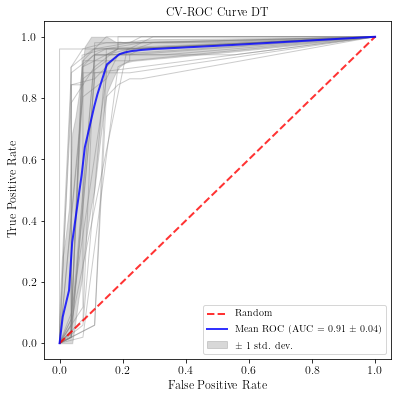

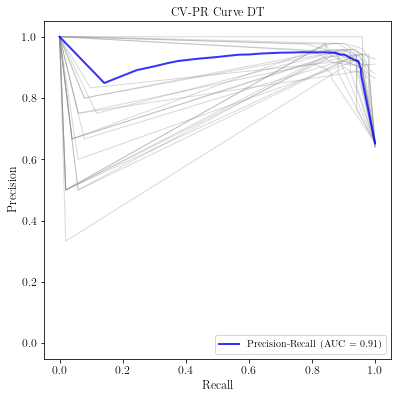

1it [00:00,  7.01it/s]

Mean accuracy:0.91231
Standard deviation:0.02556
f1-score:0.92308
Current training algorithm: RF 


25it [00:03,  6.98it/s]


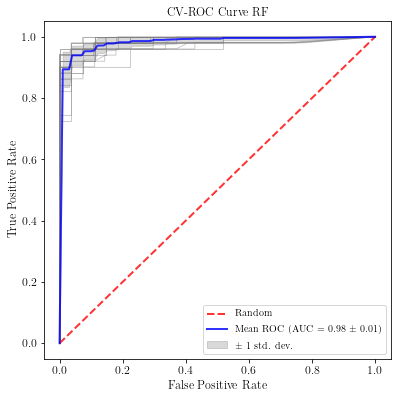

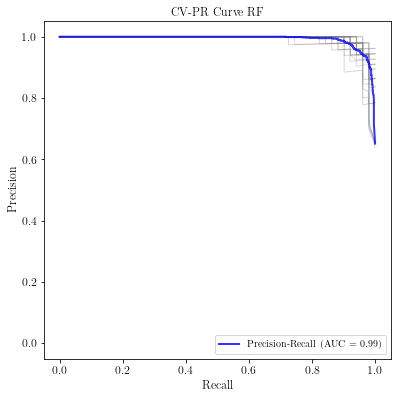

0it [00:00, ?it/s]

Mean accuracy:0.93744
Standard deviation:0.01930
f1-score:0.96154
Current training algorithm: GB 


25it [00:15,  1.63it/s]


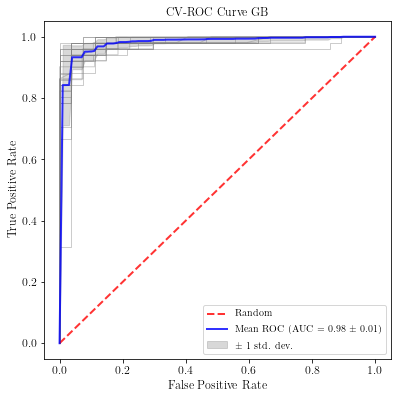

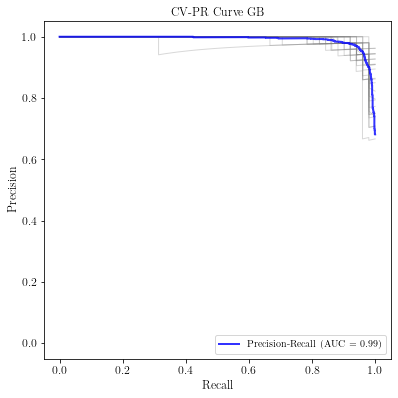

Mean accuracy:0.94154
Standard deviation:0.01816
f1-score:0.96000


In [10]:
for i, algorithm in enumerate(Algorithms): 
    print("Current training algorithm: {}".format(prettyNames[i]))
    PerovskiteModels[Abbreviations[i]] = (
        visualize.runSupervisedModel(classifier  = algorithm, 
                                     X = X,
                                     y = y.values.reshape(-1,),
                                     k = numberSplits,
                                     n = numberRuns,
                                    cv = rskfold,
                     featureImportance = True,
                                 title = prettyNames[i]))

### Visualising the results

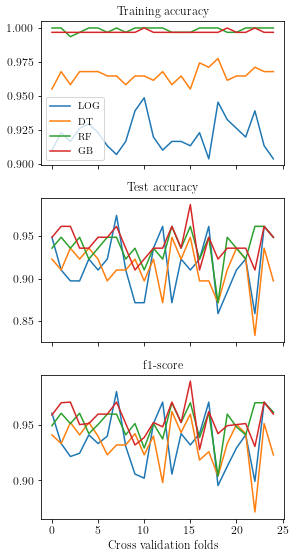

In [11]:
visualize.plot_accuracy(PerovskiteModels, prettyNames)

The standard deviation is calculated as a function difference of the 100 models in the purpose of visalizing how much the models deviate from each other.
### Interpreting important features used by the model

In [12]:
visualize.plot_important_features(PerovskiteModels, prettyNames, X=X, k = numberSplits, n = numberRuns, fileName = "FeatureImportancePerov.pdf")

Here we see that random forrest is heavily dependent on four features, while gradient boost is more dependent on three features. We set a limit that the feature needs to be important in at least 50 percent of the classifications.

Feature importance is here calculated from the last iteration of the training, and not as mean from the entire dataset. 

## "Confusion" metrics

### Sorting as a function of alphabetic order

In [13]:
visualize.plot_confusion_metrics(PerovskiteModels, prettyNames, data, k = numberSplits, n = numberRuns)

In these plots we see that gradient boost is more likely to misclassify a wider variation of compounds, with an exception for MgSiO3 for false negatives. Random forest, on the other hand, is more likely to misclassify the same compounds for all models.  
### Sorting as a function of tolerance factor

In [14]:
fig = go.Figure( 
    layout = go.Layout (
        title=go.layout.Title(text="False positives (Nruns = {})".format(numberSplits*numberRuns)),
        yaxis=dict(title='Counts'),
        xaxis=dict(title='tolerance factor')
        )
    )

for i, model in enumerate(PerovskiteModels):
    fig.add_traces(go.Bar(name=prettyNames[i], 
                          x=data['t'][model['falsePositives'] > 0],
                          y=model['falsePositives'][model['falsePositives'] > 0],
                          text=data['Compound'][model['falsePositives'] > 0],
                          )
                  )

fig.update_layout(barmode='group')
fig.add_trace(go.Scatter(x=[0.73,0.75], y=[5,5], fill='tozeroy',
                    mode= 'none', name='Not a perovskite'))

fig.add_trace(go.Scatter(x=[0.75,0.9], y=[10,10], fill='tozeroy',
                    mode= 'none', name='Orthorombic perovskite'))
fig.add_trace(go.Scatter(x=[0.9,1.0], y=[10,10], fill='tozeroy',
                    mode= 'none', name='Cubic perovskite'))
fig.add_trace(go.Scatter(x=[1.0,1.15], y=[5,5], fill='tozeroy',
                    mode= 'none', name='Hexagonal nonperovskite'))

fig.show()

From the false positive plot above, we see that there are several compounds with the same tolerance factor, giving rise to several more counts per tolerance factor compared to what is actually shown.

In [15]:
fig = go.Figure( 
    layout = go.Layout (
        title=go.layout.Title(text="falseNegatives (Nruns = {})".format(numberSplits*numberRuns)),
        yaxis=dict(title='Counts'),
        xaxis=dict(title='tolerance factor')
        )
    )

for i, model in enumerate(PerovskiteModels):
    fig.add_traces(go.Bar(name=prettyNames[i], 
                          x=data['t'][model['falseNegatives'] > 0],
                          y=model['falseNegatives'][model['falseNegatives'] > 0],
                          text=data['Compound'][model['falseNegatives'] > 0],
                          )
                  ) 
fig.update_layout(barmode='group')

fig.add_trace(go.Scatter(x=[0.73,0.75], y=[5,5], fill='tozeroy',
                    mode= 'none', name='Not a perovskite'))

fig.add_trace(go.Scatter(x=[0.75,0.9], y=[10,10], fill='tozeroy',
                    mode= 'none', name='Orthorombic perovskite'))
fig.add_trace(go.Scatter(x=[0.9,1.0], y=[10,10], fill='tozeroy',
                    mode= 'none', name='Cubic perovskite'))
fig.add_trace(go.Scatter(x=[1.0,1.15], y=[5,5], fill='tozeroy',
                    mode= 'none', name='Hexagonal nonperovskite'))

fig.show()

In [16]:
fig = go.Figure( 
    layout = go.Layout (
        title=go.layout.Title(text="falseNegatives (Nruns = {})".format(numberRuns*numberSplits)),
        yaxis=dict(title='Counts'),
        xaxis=dict(title='MA')
        )
    )

for i, model in enumerate(PerovskiteModels):
    fig.add_traces(go.Bar(name=prettyNames[i], 
                          x=data['MA'][model['falseNegatives'] > 0],
                          y=model['falseNegatives'][model['falseNegatives'] > 0],
                          text=data['Compound'][model['falseNegatives'] > 0],
                          )
                  ) 
fig.show()

In [17]:
fig = go.Figure( 
    layout = go.Layout (
        title=go.layout.Title(text="falseNegatives (Nruns = {})".format(numberRuns*numberSplits)),
        yaxis=dict(title='Counts'),
        xaxis=dict(title='MB')
        )
    )

for i, model in enumerate(PerovskiteModels):
    fig.add_traces(go.Bar(name=prettyNames[i], 
                          x=data['MB'][model['falseNegatives'] > 0],
                          y=model['falseNegatives'][model['falseNegatives'] > 0],
                          text=data['Compound'][model['falseNegatives'] > 0],
                          )
                  ) 
fig.show()

# Which perovskites are correctly predicted?

Out of 100 different runs, the article yield a prediction if over 50% of the predictions are in favor for either perovskite or not. 

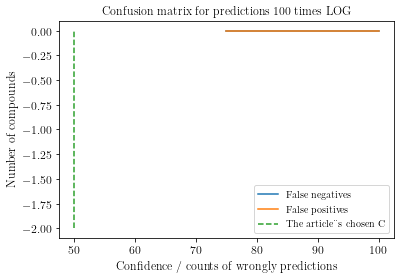

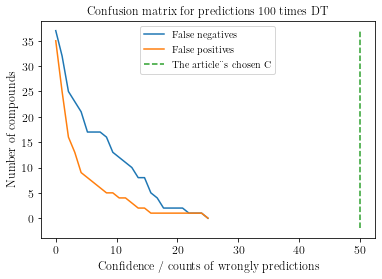

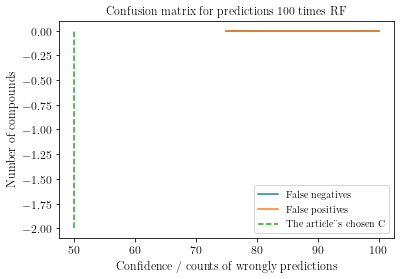

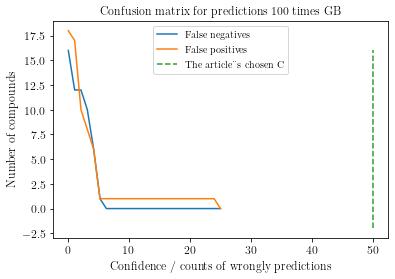

In [18]:
visualize.plot_confusion_matrix(PerovskiteModels, y, data, abbreviations=Abbreviations, names=prettyNames, k = numberSplits, n = numberRuns)

From the plot above, we can choose whichever confidence we would like to make a confusion matrix. The article has used a binomial distribution, without doing the statistics behind a one-side hypothesis test. Let us do better. 

We will start by excluding every compound that has been misclassified over 50% of the classifications.

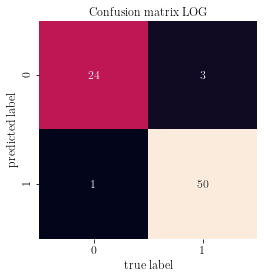

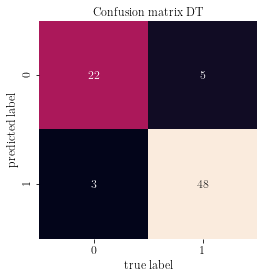

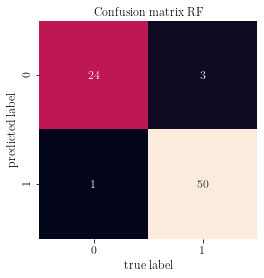

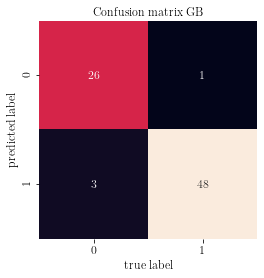

In [19]:
visualize.confusion_matrix_plot(PerovskiteModels, y, prettyNames)

### Preparing training data for the cubic classification

After training a model on the perovskite data, we would like to make a smaller subset of the dataset as the training data for a model that can classify a cubic perovskite versus a non-cubic perovskite. We will remove all compounds that got misclassified at least 50% of 100 classifications, in addition to non-perovskites. Thus, if two algorithms is seen with same compounds that are being removed due to false negatives but different number of false positives, they will have the same test data.

To start of, which compounds are predicted most times as perovskite, but are in fact non-perovskite? 

In [20]:
for i, model in enumerate(PerovskiteModels):
    print(prettyNames[i], ": over 50 percent misclassifications:")
    print("False negatives:")
    print(data['Compound'][model['falseNegatives'] > numberRuns*numberSplits/2])
    print("False positives:")
    print(data['Compound'][model['falsePositives'] > numberRuns*numberSplits/2])
    print("")

LOG  : over 50 percent misclassifications:
False negatives:
170    CaSiO3
173     CaUO3
176    CdGeO3
273    MgSiO3
274     NaIO3
276    NaPaO3
277    NaSbO3
279     NaUO3
294    PbGeO3
345    SrPrO3
350    SrTeO3
Name: Compound, dtype: object
False positives:
9      BaCoO3
10     BaCrO3
11     BaGeO3
12     BaMnO3
23     CeErO3
24     CeHoO3
33     CsNbO3
34      CsVO3
57     InFeO3
58     InMnO3
59      KBiO3
63      KSbO3
66     LaDyO3
89     MnTiO3
91     NaBiO3
97     NdLuO3
98     NdYbO3
108    PrErO3
110    PrTmO3
129     YInO3
Name: Compound, dtype: object

DT  : over 50 percent misclassifications:
False negatives:
194    DyInO3
224    GdInO3
273    MgSiO3
Name: Compound, dtype: object
False positives:
5       AgVO3
23     CeErO3
57     InFeO3
58     InMnO3
59      KBiO3
63      KSbO3
77      LuBO3
91     NaBiO3
95      NaVO3
119    SrThO3
Name: Compound, dtype: object

RF  : over 50 percent misclassifications:
False negatives:
Series([], Name: Compound, dtype: object)
False po

In [21]:
allowedOfNumberMiscalculations = 50
correctlyPredictedPerovskites = {}

for abbreviation in Abbreviations:     
    correctlyPredictedPerovskites[abbreviation] = visualize.findCorrectlyPredictedPerovskites(
        PerovskiteModels[abbreviation], data, allowedOfNumberMiscalculations)

#correctlyPredictedPerovskites["GB"]

# Training the model for cubic perovskite or not

## Finding the optimal hyperparameters

We will here do the same procedure as for the perovskite model, however, with the added complexity that the different models will run on different data depending on what the model predicted for perovskites. 

In [22]:
rskfold = RepeatedStratifiedKFold(n_splits=numberSplits, n_repeats=numberRuns, random_state=random_state)
allFeatures = ["rA", "rB", "MA", "MB", "dAO", "dBO", "rA/rO", "rB/rO", "t"]
CubicModelsBestParams = pd.Series({}, dtype="string")
BestParamsAlgorithms = []
for i, algorithm in tqdm(enumerate(InsertAlgorithms)):
    for method in includeSampleMethods:
        print("Finding best params for: {}".format(InsertAbbreviations[i] + " " + method))
        bestEstimator, CubicModelsBestParams[InsertAbbreviations[i] + " " + method] = train_model.applyGridSearch(
                                                                            X = correctlyPredictedPerovskites[InsertAbbreviations[i] + " " + method][allFeatures],
                                                                            y = correctlyPredictedPerovskites[InsertAbbreviations[i] + " " + method]["Cubic"].values.reshape(-1,),
                                                                        model = algorithm, 
                                                                           cv = rskfold, 
                                                                 sampleMethod = method)
        # Only the parameters for the algorithm changes here, 
        # since pretty name and abbreviations are already done.
        BestParamsAlgorithms.append(bestEstimator)

0it [00:00, ?it/s]

Finding best params for: LOG 
Fitting 25 folds for each of 28 candidates, totalling 700 fits


1it [00:04,  4.03s/it]

Finding best params for: DT 
Fitting 25 folds for each of 280 candidates, totalling 7000 fits


2it [00:22, 12.35s/it]

Finding best params for: RF 
Fitting 25 folds for each of 84 candidates, totalling 2100 fits


3it [02:58, 78.03s/it]

Finding best params for: GB 
Fitting 25 folds for each of 84 candidates, totalling 2100 fits


4it [04:22, 65.60s/it]


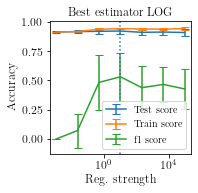

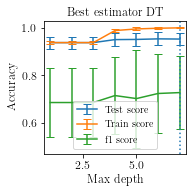

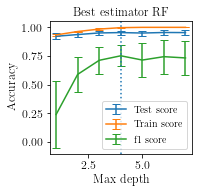

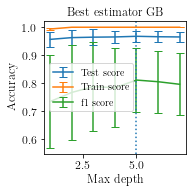

In [23]:
visualize.gridsearchVSscores(X = X, ModelsBestParams = CubicModelsBestParams,
                            prettyNames = prettyNames, cubicCase = True)

6it [00:00, 55.34it/s]

Current training algorithm: LOG 


25it [00:00, 45.74it/s]


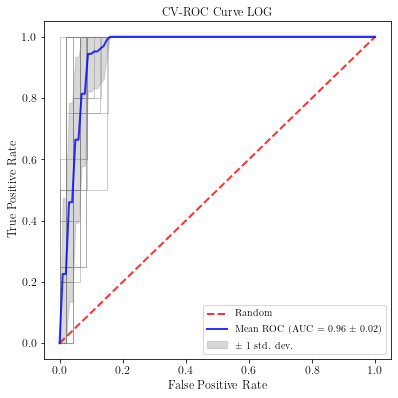

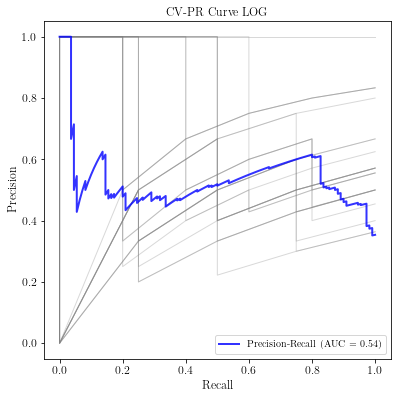

7it [00:00, 68.13it/s]

Mean accuracy:0.92202
Standard deviation:0.02197
f1-score:0.50000
Current training algorithm: DT 


25it [00:00, 69.02it/s]


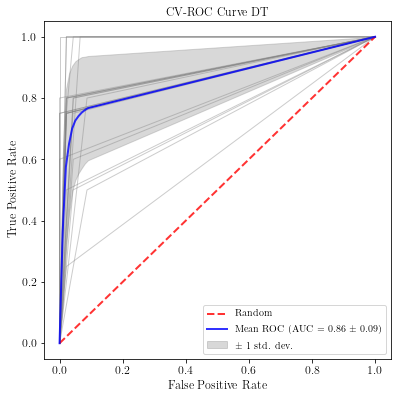

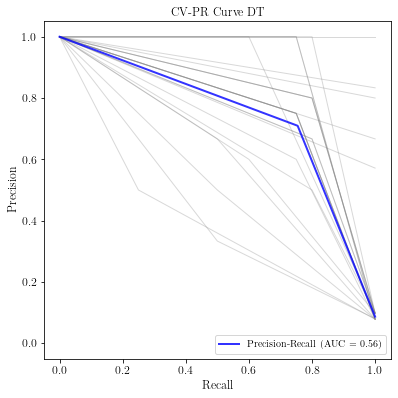

0it [00:00, ?it/s]

Mean accuracy:0.95194
Standard deviation:0.02688
f1-score:0.75000
Current training algorithm: RF 


25it [00:11,  2.11it/s]


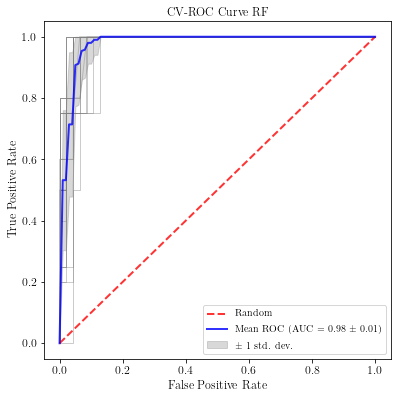

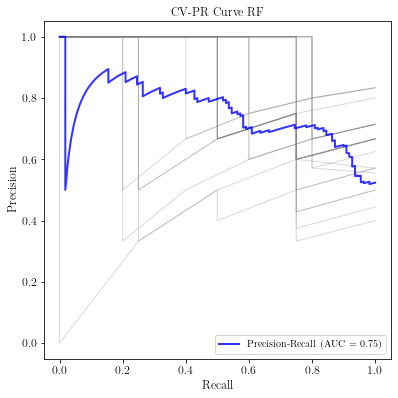

2it [00:00, 11.47it/s]

Mean accuracy:0.95429
Standard deviation:0.01754
f1-score:0.75000
Current training algorithm: GB 


25it [00:02, 11.40it/s]


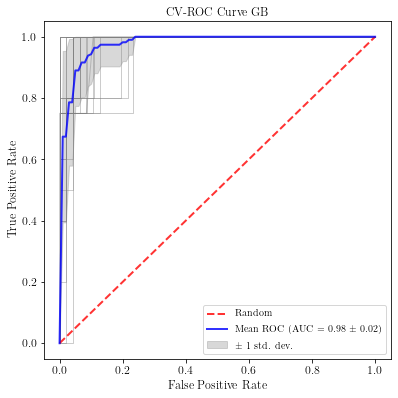

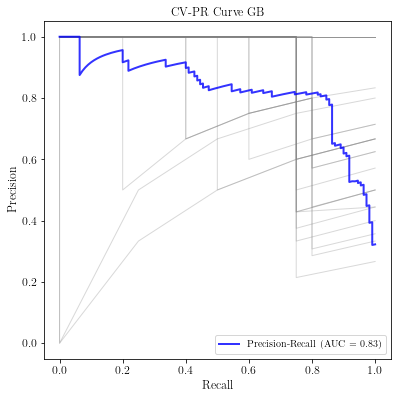

Mean accuracy:0.96767
Standard deviation:0.01933
f1-score:0.85714


In [24]:
CubicModels = pd.Series({}, dtype="string")
for i, algorithm in enumerate(BestParamsAlgorithms): 
    print("Current training algorithm: {}".format(prettyNames[i]))
    CubicModels[Abbreviations[i]] = (
        visualize.runSupervisedModel(classifier  = algorithm, 
                                     X = correctlyPredictedPerovskites[Abbreviations[i]][allFeatures],
                                     y = correctlyPredictedPerovskites[Abbreviations[i]]["Cubic"].values.reshape(-1,),
                                     k = numberSplits,
                                     n = numberRuns,
                                    cv = rskfold,
                     featureImportance = True,
                                 title = prettyNames[i]))

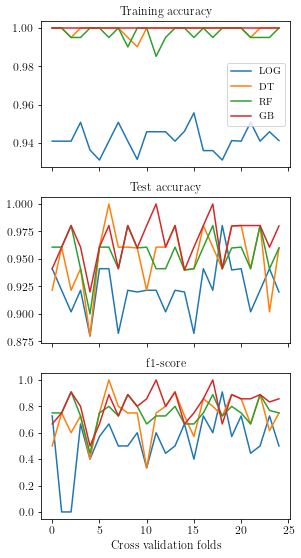

In [25]:
visualize.plot_accuracy(CubicModels, prettyNames)

In [26]:
visualize.plot_important_features(CubicModels, prettyNames, X, k = numberSplits, n = numberRuns, fileName = "FeatureImportanceCubicPerov.pdf")

Once again, we see here that some of the features are redundant, as both random forrest and gradient boost agrees on rA, rA/rO and t as features. 

In [28]:
visualize.plot_confusion_metrics(CubicModels, 
                                 prettyNames, 
                                 correctlyPredictedPerovskites, 
                                 k = numberSplits, 
                                 n = numberRuns, 
                                 abbreviations = Abbreviations, 
                                 cubicCase = True)

# Predictions on the test set

We will be using the generated training datasets for both the perovskite and cubic classification to train a model, which will be used to classify a completely independent test dataset. 

## Predicting perovskites

In [58]:
PerovskiteTestData[PerovskiteTestData[allFeatures].columns[PerovskiteModels[Abbreviations[2]]["importantKeys"]>threshold]]

rB    dAO  rB/rO         t
0    0.950  1.805  0.704  0.863858
1    0.780  1.805  0.578  0.932785
2    0.580  1.805  0.430  1.029416
3    0.760  1.805  0.563  0.941624
4    0.620  1.805  0.459  1.008520
..     ...    ...    ...       ...
620  0.868  1.849  0.643  0.707744
621  0.900  1.849  0.667  0.697681
622  1.032  1.979  0.764  0.750733
623  1.032  1.992  0.764  0.755185
624  1.032  1.968  0.764  0.748062

[625 rows x 4 columns]

In [53]:
X[X.columns[PerovskiteModels[Abbreviations[2]]["importantKeys"]>threshold]]

rB    dAO  rB/rO      t
0    0.760  1.805  0.563  0.942
1    0.470  1.805  0.348  1.092
2    0.130  1.805  0.096  1.343
3    0.380  1.805  0.281  1.149
4    0.600  1.805  0.444  1.019
..     ...    ...    ...    ...
385  0.645  2.014  0.478  0.902
386  0.600  2.014  0.444  0.923
387  0.745  2.014  0.552  0.859
388  0.670  2.014  0.496  0.891
389  0.640  2.014  0.474  0.905

[390 rows x 4 columns]

In [67]:
PerovskiteTestData = pd.read_csv(data_dir / "processed" / "625TestData.csv")

Summary             = pd.DataFrame({}, dtype="string")
Summary["Compound"] = PerovskiteTestData["Compound"]

PredictedPerovskites = pd.Series({}, dtype="string")

threshold = int(numberSplits*numberRuns - numberSplits*numberRuns/2) #50% when equal
print(threshold)
for i, algorithm in enumerate(Algorithms):#
    PredictedPerovskites[Abbreviations[i]+" P"], PredictedPerovskites[Abbreviations[i]+" P Prob"] = predict_model.runPredictions(algorithm,\
                                    trainingData   = X[X.columns[PerovskiteModels[Abbreviations[i]]["importantKeys"]>threshold]],\
                                    trainingTarget = y.values.reshape(-1,),\
                                    testData   = PerovskiteTestData[PerovskiteTestData[allFeatures].columns[PerovskiteModels[Abbreviations[i]]["importantKeys"]>threshold]],
                                    prettyName = prettyNames[i])#.columns[PerovskiteModels[Abbreviations[i]]["importantKeys"]>threshold]])

for abbreviation in Abbreviations:
    PerovskiteTestData[abbreviation + " P"] = PredictedPerovskites[abbreviation + " P"]
    Summary[abbreviation + " P"]            = PredictedPerovskites[abbreviation + " P"]
    Summary[abbreviation + " P Prob"]       = PredictedPerovskites[abbreviation + " P Prob"]
    print(abbreviation, "predict the number of perovskites as: ", np.sum(PredictedPerovskites[abbreviation+" P"]))

12
Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(C=4641.588833612773, max_iter=200,
                                    random_state=98127480))])
(390, 9)
Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                                        random_state=98127480))])
(390, 3)
Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=7, max_features='sqrt',
                                        n_estimators=50,
                                        random_state=98127480))])
(390, 4)
Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(max_depth=1, max_features='log2',
                                            n_estimators=1000,
                                            random_state=98127480))])
(390,

In [32]:
Summary

Compound  LOG  P  LOG  P Prob  DT  P  DT  P Prob  RF  P  RF  P Prob  \
0      AgIO3       0     0.485134      1    1.000000      1    0.547077   
1     AgPaO3       0     0.219396      1    0.913043      1    0.773058   
2     AgReO3       0     0.182976      1    0.913043      0    0.333186   
3      AgUO3       0     0.342250      1    0.913043      1    0.699725   
4      AgWO3       0     0.464220      1    0.913043      1    0.806368   
..       ...     ...          ...    ...         ...    ...         ...   
620   ScYbO3       0     0.000105      0    0.000000      0    0.485911   
621    ScYO3       0     0.000006      0    0.000000      0    0.400000   
622   ErLaO3       0     0.000003      0    0.000000      0    0.132000   
623   HoLaO3       0     0.000005      0    0.000000      0    0.132000   
624   TmLaO3       0     0.000002      0    0.000000      0    0.132000   

     GB  P  GB  P Prob  
0        1    0.972054  
1        1    0.836618  
2        0    0.289441  
3        1    0.836618  
4        1    0.590042  
..     ...         ...  
620      1    0.558249  
621      0    0.163867  
622      0    0.262973  
623      0    0.262973  
624      0    0.262973  

[625 rows x 9 columns]

## Finding training and test data for the cubic prediction
Now, we need to remove all the non-perovskite in order to classify them into cubic-perovskites or non-cubic perovskites. Alas, the results above does imply many different training sets because of different results from the classifiers from the previous classification.  

In [33]:
CubicTestData = pd.Series({}, dtype="string")

def RemoveNonPerovskites(predictions):
    remove_indices = np.array(PerovskiteTestData['Compound'][predictions == 0].index)
    cubicTestData = PerovskiteTestData.drop(index=remove_indices)
    cubicTestData.reset_index(drop=False, inplace=True)
    return cubicTestData

for abbreviation in Abbreviations:
    CubicTestData[abbreviation] = RemoveNonPerovskites(PerovskiteTestData[abbreviation+" P"])

In [34]:
print(CubicTestData["RF "].shape)
print(CubicTestData["GB "].shape)

(202, 17)
(203, 17)


However, here we meet a challenge since the training data does only contain less than 9 percent cubic perovskites. When training the model earlier, we used a stratified cross fold validation scheme to create training and validation sets on the basis of a 50/50 split. We did this by the help of a stratified parameter which is built into SciKitLearn. Now, we would like to use all of the cubic data while keeping it 50/50 on the entire dataset, but this we need to make ourself. 

In [35]:
#Not using pandas dataframe because the contents does not neccessarily have the same shape
stratifiedCubicData = pd.Series({}, dtype="string")

#choose percentage of data that should be cubic. 50/50 split is percentage=0.085
percentage = 0.25

def getEqualClassTrainingData(predictedPerovskites, Name):
    cubics    = predictedPerovskites.iloc[predictedPerovskites["Cubic"][predictedPerovskites["Cubic"]==1].index]
    nonCubics = predictedPerovskites.iloc[predictedPerovskites["Cubic"][predictedPerovskites["Cubic"]!=1].index]
    print(Name, ":")
    print("The amount of cubic perovskites entries in the data is {}, with a total percentage of {}"\
          .format(np.sum(cubics["Cubic"]), np.sum(cubics["Cubic"])/len(predictedPerovskites["Cubic"])))
    
    # The data trained on should be evenly distributed. Here, we are just picking random numbers. 
    nonCubicsSubSet = nonCubics.sample(n = int(percentage*len(predictedPerovskites.index)), random_state=random_state)

    #test to make the reader aware of the distribution in the training data
    if (nonCubicsSubSet.shape!=cubics.shape):
        print("Current shape Cubics: {} and nonCubics: {}".format(cubics.shape, nonCubicsSubSet.shape))
    
    #Combining the subsets
    stratCubicData = pd.concat([cubics, nonCubicsSubSet])
    stratCubicData.reset_index(drop=False, inplace=True)
    return stratCubicData

for abbreviation in Abbreviations: 
    print("Name  :{}".format(abbreviation))
    print("Shape :{}".format(correctlyPredictedPerovskites[abbreviation].shape))
    stratifiedCubicData[abbreviation] = getEqualClassTrainingData(correctlyPredictedPerovskites[abbreviation], abbreviation)

Name  :LOG 
Shape :(254, 12)
LOG  :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.08661417322834646
Current shape Cubics: (22, 12) and nonCubics: (63, 12)
Name  :DT 
Shape :(254, 12)
DT  :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.08661417322834646
Current shape Cubics: (22, 12) and nonCubics: (63, 12)
Name  :RF 
Shape :(254, 12)
RF  :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.08661417322834646
Current shape Cubics: (22, 12) and nonCubics: (63, 12)
Name  :GB 
Shape :(254, 12)
GB  :
The amount of cubic perovskites entries in the data is 22, with a total percentage of 0.08661417322834646
Current shape Cubics: (22, 12) and nonCubics: (63, 12)


# Predicting cubic perovskites
Now that we have stratified data, we can finally fit our classifier.


In [36]:
for i, data in enumerate(stratifiedCubicData):
    print("The shape of {} is: {}".format(prettyNames[i], data.shape))

The shape of LOG  is: (85, 13)
The shape of DT  is: (85, 13)
The shape of RF  is: (85, 13)
The shape of GB  is: (85, 13)


In [44]:
PredictedCubics = {}
for i, algorithm in enumerate(Algorithms):
    PredictedCubics[Abbreviations[i]+" C"], PredictedCubics[Abbreviations[i]+" C Prob"] = predict_model.runPredictions(algorithm,\
                                    trainingData   = stratifiedCubicData[Abbreviations[i]][stratifiedCubicData[Abbreviations[i]][allFeatures].columns[CubicModels[Abbreviations[i]]["importantKeys"]>threshold]],\
                                    trainingTarget = stratifiedCubicData[Abbreviations[i]]["Cubic"],\
                                    testData   = CubicTestData[Abbreviations[i]][CubicTestData[Abbreviations[i]][allFeatures].columns[CubicModels[Abbreviations[i]]["importantKeys"]>threshold]],
                                    prettyName = prettyNames[i],
                                    cubicCase  = True)
    print(Abbreviations[i], " predict the number of cubic perovskites as: ", np.sum(PredictedCubics[Abbreviations[i]+" C"]))      

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(C=4641.588833612773, max_iter=200,
                                    random_state=98127480))])
LOG   predict the number of cubic perovskites as:  14
Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                                        random_state=98127480))])
DT   predict the number of cubic perovskites as:  18
Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=7, max_features='sqrt',
                                        n_estimators=50,
                                        random_state=98127480))])
RF   predict the number of cubic perovskites as:  9
Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(max_depth=1, max_features='log2',
         

In [38]:
for abbreviation in Abbreviations:
    tmp1 = np.empty(len(Summary.index))
    tmp2 = np.copy(tmp1)
    tmp2[:] = np.nan
    tmp1[:] = -1 #For all non-perovskites

    tmp1[CubicTestData[abbreviation]["index"][PredictedCubics[abbreviation + " C"] == 1].values] = 1
    tmp1[CubicTestData[abbreviation]["index"][PredictedCubics[abbreviation + " C"] == 0].values] = 0

    tmp2[CubicTestData[abbreviation]["index"].values] = PredictedCubics[abbreviation + " C Prob"]

    Summary[abbreviation + " C"]       = tmp1.astype(int)
    Summary[abbreviation + " C Prob"]  = tmp2

In [39]:
Summary[Summary["GB  C"]==1]

Compound  LOG  P  LOG  P Prob  DT  P  DT  P Prob  RF  P  RF  P Prob  \
1     AgPaO3       0     0.219396      1    0.913043      1    0.773058   
73    PbAmO3       0     0.352835      1    0.913043      1    0.913487   
77    PbNpO3       0     0.054326      0    0.250000      1    0.681030   
78    PbPaO3       0     0.306154      1    0.913043      1    0.918289   
88    SrPaO3       1     0.753746      1    0.986111      1    0.986195   
213   CsPaO3       1     0.999865      1    0.986111      1    0.616741   
217    CsUO3       1     0.999869      1    0.986111      1    0.557297   
221   RbBiO3       1     0.998280      1    0.986111      1    0.563033   
231    BaVO3       1     0.999514      1    0.986111      1    0.934893   
291   EuSiO3       0     0.018872      1    0.986111      1    0.540000   
375   PbCoO3       1     0.991996      1    0.913043      1    0.997393   
376   PbCrO3       1     0.968485      1    0.913043      1    0.997393   
378   PbNiO3       1     0.891617      1    0.913043      1    0.977393   

     GB  P  GB  P Prob  LOG  C   LOG  C Prob  DT  C  DT  C Prob  RF  C  \
1        1    0.836618      -1           NaN      0    0.000000      0   
73       1    0.985561      -1           NaN      0    0.000000      0   
77       1    0.978448      -1           NaN     -1         NaN      0   
78       1    0.994707      -1           NaN      0    0.000000      0   
88       1    0.999212       0  2.330867e-01      0    0.000000      0   
213      1    0.983288       1  9.992582e-01      1    1.000000      1   
217      1    0.922243       1  9.992808e-01      1    1.000000      1   
221      1    0.650861       1  9.881242e-01      1    1.000000      1   
231      1    0.993029       1  8.015951e-01      1    1.000000      1   
291      1    0.981364      -1           NaN      0    0.000000      0   
375      1    0.995646       0  4.709752e-68      1    0.666667      1   
376      1    0.995646       0  6.292570e-68      1    0.666667      1   
378      1    0.982438       0  9.813824e-68      1    0.666667      1   

     RF  C Prob  GB  C  GB  C Prob  
1      0.040000      1    0.730547  
73     0.020000      1    0.730547  
77     0.040000      1    0.680640  
78     0.060000      1    0.730547  
88     0.020000      1    0.838100  
213    0.578333      1    0.999785  
217    0.578333      1    0.778919  
221    0.990000      1    0.999999  
231    0.832000      1    0.998785  
291    0.240000      1    0.619793  
375    0.560000      1    0.974502  
376    0.560000      1    0.974502  
378    0.800000      1    0.974502

Here, we see our candidates with their probabilities.

In [40]:
Summary.to_csv(data_dir / "summary" / "625SupervisedPredictions.csv", sep=",", index = False)

In [41]:
Summary

Compound  LOG  P  LOG  P Prob  DT  P  DT  P Prob  RF  P  RF  P Prob  \
0      AgIO3       0     0.485134      1    1.000000      1    0.547077   
1     AgPaO3       0     0.219396      1    0.913043      1    0.773058   
2     AgReO3       0     0.182976      1    0.913043      0    0.333186   
3      AgUO3       0     0.342250      1    0.913043      1    0.699725   
4      AgWO3       0     0.464220      1    0.913043      1    0.806368   
..       ...     ...          ...    ...         ...    ...         ...   
620   ScYbO3       0     0.000105      0    0.000000      0    0.485911   
621    ScYO3       0     0.000006      0    0.000000      0    0.400000   
622   ErLaO3       0     0.000003      0    0.000000      0    0.132000   
623   HoLaO3       0     0.000005      0    0.000000      0    0.132000   
624   TmLaO3       0     0.000002      0    0.000000      0    0.132000   

     GB  P  GB  P Prob  LOG  C  LOG  C Prob  DT  C  DT  C Prob  RF  C  \
0        1    0.972054      -1          NaN      0    0.000000      0   
1        1    0.836618      -1          NaN      0    0.000000      0   
2        0    0.289441      -1          NaN      1    0.666667     -1   
3        1    0.836618      -1          NaN      0    0.000000      0   
4        1    0.590042      -1          NaN      1    0.666667      0   
..     ...         ...     ...          ...    ...         ...    ...   
620      1    0.558249      -1          NaN     -1         NaN     -1   
621      0    0.163867      -1          NaN     -1         NaN     -1   
622      0    0.262973      -1          NaN     -1         NaN     -1   
623      0    0.262973      -1          NaN     -1         NaN     -1   
624      0    0.262973      -1          NaN     -1         NaN     -1   

     RF  C Prob  GB  C  GB  C Prob  
0          0.02      0    0.010272  
1          0.04      1    0.730547  
2           NaN     -1         NaN  
3          0.06      0    0.002049  
4          0.14      0    0.004123  
..          ...    ...         ...  
620         NaN      0    0.000121  
621         NaN     -1         NaN  
622         NaN     -1         NaN  
623         NaN     -1         NaN  
624         NaN     -1         NaN  

[625 rows x 17 columns]